<a href="https://colab.research.google.com/github/graysonw15/2020-sensor-miniproject/blob/main/bbps_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/images/cnn

### Initial model using ConvNet
No need to set up the dataset again unless you want to resize the images. If you do, change the width and height of the resizing function(OpenCV)

Import drive to access the data.npy file that has the data

Importing Python packages

In [ ]:
!pip install tensorflow==1.5.0

     |████████████████████████████████| 44.4MB 76kB/s 
     |████████████████████████████████| 3.0MB 68.2MB/s 
     |████████████████████████████████| 890kB 66.1MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=291e14edd3c98576a8f37397016cf771594680251620fd53b902ee7780794554
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.2.1
    Uninstalling bleach-3.2.1:
      Successfully uninstalled bleach-3.2.1
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
print(keras.__version__)

from tensorflow.python.keras import layers, models, Model
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np


2.3.0
2.4.0


Mounting to Google Drive to collect images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Setting up the dataset using OpenCV 
change width and height to change the pixel dimensions of the images
#### Warning- Runtime is long

In [ ]:
import cv2
import os
import numpy as np

path = "/content/drive/Shared drives/SeniorDesign2020/Algorithm/ai_dataset/"

data_folders = ["0", "1", "2", "3"]

filenames = [os.listdir(path + f) for f in data_folders]
print('Number of images in each group: ', [len(f) for f in filenames])

files_dict = dict(zip(data_folders, filenames))

train_images = []
train_labels = []

#Change width and height for the images
width = 224
height = 224

for (dict_key, files_list) in files_dict.items():
  for filename in files_list:

    if '.jpg' not in filename:
      continue

    image_path = path + dict_key + '/' + filename
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #calculate the 50 percent of original dimensions
    #width = int(img.shape[1] * scale_percent / 100)
    #height = int(img.shape[0] * scale_percent / 100)  
    width = int(256)
    height = int(256)
    # dsize
    dsize = (width, height)
    # resize image
    img = cv2.resize(img, dsize)

    train_images.append(img)
    train_labels.append(int(dict_key))
  
  print('Finished with folder ' + dict_key + '.....')

train_images = np.array(train_images)
train_labels = np.array(train_labels).reshape((len(train_labels),1))
print('Dimensions of train_image: ', train_images.shape)
print('Dimensions of train_label: ', train_labels.shape)


Number of images in each group:  [225, 2450, 801, 1101]
Finished with folder 0.....
Finished with folder 1.....
Finished with folder 2.....
Finished with folder 3.....
Dimensions of train_image:  (4575, 256, 256, 3)
Dimensions of train_label:  (4575, 1)


### Same process with test data
Change width and height to change the pixel dimensions of images

#### Warning - Runtime is long

In [ ]:
path = "/content/drive/Shared drives/SeniorDesign2020/Algorithm/ai_dataset/"

testing_folders = ["0_test", "1_test", "2_test", "3_test"]

filenames = [os.listdir(path + f) for f in testing_folders]
print('Number of images in each group: ', [len(f) for f in filenames])

files_dict = dict(zip(testing_folders, filenames))

test_images = []
test_labels = []

for (dict_key, files_list) in files_dict.items():
  for filename in files_list:
    image_path = path + dict_key + '/' + filename
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #calculate the 50 percent of original dimensions
    width = int(256)
    height = int(256)  
    # dsize
    dsize = (width, height)
    # resize image
    img = cv2.resize(img, dsize)


    test_images.append(img)
    test_labels.append(int(dict_key[0]))

  print('Finished with folder ' + dict_key + '.....')

test_images = np.array(test_images)
test_labels = np.array(test_labels).reshape((len(test_labels),1))
print('Dimensions of test_image: ', test_images.shape)
print('Dimensions of test_label: ', test_labels.shape)

Number of images in each group:  [275, 250, 175, 250]
Finished with folder 0_test.....
Finished with folder 1_test.....
Finished with folder 2_test.....
Finished with folder 3_test.....
Dimensions of test_image:  (950, 256, 256, 3)
Dimensions of test_label:  (950, 1)


##Saving matrices to .npy file for later use

#Run this after completing new set of data

In [ ]:
with open('/content/drive/Shared drives/SeniorDesign2020/Algorithm/data?.npy', 'wb') as f:
    np.save(f, train_images)
    np.save(f, train_labels)
    np.save(f, test_images)
    np.save(f, test_labels)

FileNotFoundError: ignored

-----------------
### Load in npy file of preference
- data64.npy = 64x64x3 images
- data256.npy = 256x256x3 images

In [ ]:
with open('/content/drive/Shared drives/SeniorDesign2020/Algorithm/data256.npy', 'rb') as f:
    train_images = np.load(f)
    train_labels = np.load(f)
    test_images = np.load(f)
    test_labels = np.load(f)

print('Dimensions of train_image: ', train_images.shape)
print('Dimensions of train_label: ', train_labels.shape)
print('Dimensions of test_image: ', test_images.shape)
print('Dimensions of test_label: ', test_labels.shape)

Dimensions of train_image:  (4575, 256, 256, 3)
Dimensions of train_label:  (4575, 1)
Dimensions of test_image:  (950, 256, 256, 3)
Dimensions of test_label:  (950, 1)


### Shuffling matrices and labels for training

In [ ]:
indices = np.arange(train_images.shape[0])
np.random.shuffle(indices)

train_images = train_images[indices]
train_labels = train_labels[indices]

indices = np.arange(test_images.shape[0])
np.random.shuffle(indices)

test_images = test_images[indices]
test_labels = test_labels[indices]

print('images shuffled...')

images shuffled...


###Displaying example of images with labels

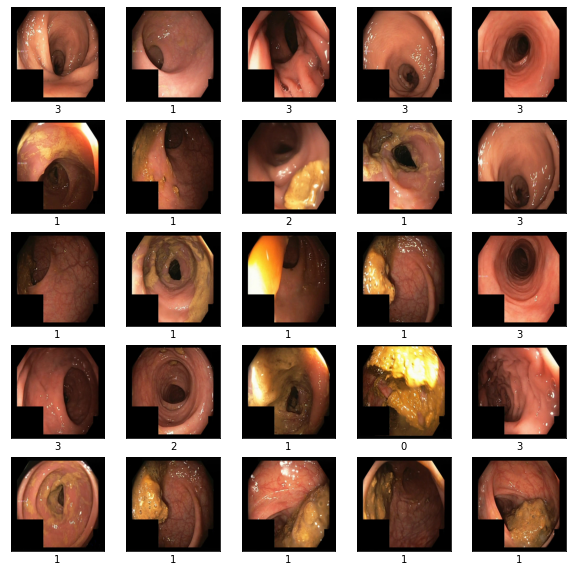

In [ ]:

#convert data to type float32
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

train_images, testing_images = train_images/255.0, test_images/255.0

class_names = ['0', '1', '2', '3']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Creating a simple ConvNet

In [ ]:
model = models.Sequential([
  layers.Conv2D(32, 3, activation='relu', input_shape = (256,256,3)),
  layers.MaxPool2D(2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPool2D(2),
  layers.Flatten(),
  layers.Dropout(0.7),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(4, activation='softmax')
])

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 246016)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               31490176  
__________

In [ ]:

optim = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optim,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs = 10)

NameError: ignored

In [ ]:
#Model 64x64x3 is achieving accuracy of 80.84% for testing data

# Model 256x256x3 is 81.16% accurate
model.evaluate(test_images, test_labels)

950/950 [==============================]950/950 [==============================] - 30s 32ms/step



[3.1218206777070696, 0.8063157897246511]

### Example of predicting

In [ ]:
print('True label: \n' , test_labels[:5])
print('\n')
pred = model.predict(test_images[:5])
print(pred)

True label: 
 [[1]
 [2]
 [1]
 [0]
 [3]]


[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


### Save model

In [ ]:
path = "/content/drive/Shared drives/SeniorDesign2020/Algorithm/models/"
pixel_dim = "256"
test_acc = "80_t1_5_h5v2"

full_path = path + "model_" + pixel_dim + "_" + test_acc + '.h5'

model.save(full_path)

### Load in model from Drive


In [ ]:
path = "/content/drive/Shared drives/SeniorDesign2020/Algorithm/models/"
pixel_dim = "256"
test_acc = "81"
full_path = path + "model_" + pixel_dim + "_" + test_acc

bbps_model = keras.models.load_model(full_path)

print('Model loaded in..')

Model loaded in..


In [ ]:
path = "/content/drive/Shared drives/SeniorDesign2020/Algorithm/models/"
pixel_dim = "256"
test_acc = "81"
full_path = path + "model_" + pixel_dim + "_" + test_acc + '_h5v' + '.h5'
bbps_model.save(full_path, save_format='h5')


# CNN Model Function
Takes in image matrix, and outputs class

In [ ]:
# BBPS Function
from google.colab.patches import cv2_imshow
import cv2

def BBPSPredict(image):
  #Works if image dim = (1, x, y, z)
  #Can't work if image dim = (x, y, z)
  prob_prediction = bbps_model.predict(image)
  return np.argmax(prob_prediction)


## Example

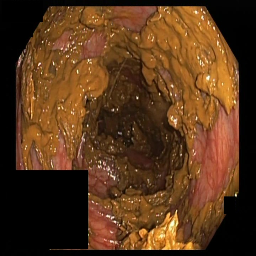

True Label:  [0]
Predicted BBPS:  0


In [ ]:
index = 2 # Select any image from testing set (index = [0, 949])

img = test_images[index]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)


image = np.array([test_images[index]]) #imcoming frame from video stream
prob = BBPSPredict(image)
print('True Label: ', test_labels[index] )
print('Predicted BBPS: ', prob)

## Augmenting Score Function

The function below is intended to display the augment the prediction and label in the top left corner of a 256x256 image. In the model deployment, the video remains displaying a 720x576 frame, so the augmenting function implemented there will be slightly different (different specified coordinates).

In [ ]:
def augment_score256(im, pred, bbps):
	pred_str = 'PRED: ' + str(pred)
	bbps_str = 'BBPS: ' + str(bbps)
	font = cv2.FONT_HERSHEY_SIMPLEX
	cv2.putText(im, pred_str, (5,15), font, .25, (0, 255, 0), 1, cv2.LINE_AA)
	cv2.putText(im, bbps_str, (5,25), font, .25, (0, 255, 0), 1, cv2.LINE_AA)
	return im

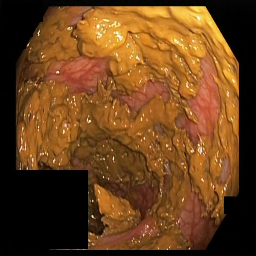

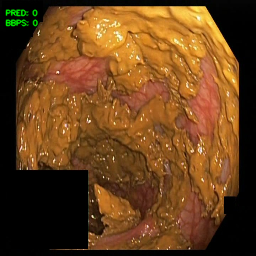

In [ ]:
index = 50 # Select any image from testing set (index = [0, 949])
image = test_images[index]
tensor = np.array([image]) #incoming frame from video stream
pred = BBPSPredict(tensor)
bbps = str(test_labels[index]).lstrip('[').rstrip(']')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(image)

image = augment_score256(image, pred, bbps)
cv2_imshow(image)


# Model Implementation

## Data Preparation for Real-Time Deployment
Training was done on 256x256 RGB, so incoming frame must be converted to these dimensions for accuracy

In [ ]:
import cv2
import numpy as np
def data_prep(im, width, height):
    #removing the botton-left green box
    im[383:560,30:248] = (0,0,0)
	  #removing the botton-right logo
    im[442:482, 630:660] = (0,0,0)
	  # Removing the top-left text
    im[1:50, 5:120] = (0,0,0)
    im[55:84, 30:92] = (0,0,0)
    im[80:110, 32:72] = (0,0,0)
    # Covert to RGB, downsample, and return np array
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    dsize = (int(width), int(height))
    im = cv2.resize(im, dsize)
    imnp = np.array([np.array(im)])
    return imnp

## Augmenting Function for Real-Time Deployment
Augmenting the prediction and BBPS must be adjusted for different frame dimensions. Each incoming frame has a prediction in the top left corner, using this function.

In [ ]:
def augment_score(im, pred, bbps):
	pred_str = 'PRED: ' + str(pred)
	bbps_str = 'BBPS: ' + str(bbps)
	font = cv2.FONT_HERSHEY_SIMPLEX
	cv2.putText(im, pred_str, (40,35), font, .5, (0, 255, 0), 1, cv2.LINE_AA)
	cv2.putText(im, bbps_str, (40,55), font, .5, (0, 255, 0), 1, cv2.LINE_AA)
	return im

## Real-Time Video Deployment
Video being predicted comes from the Videos directory in the Algorithms folder. Output video is saved in the Frame Extraction directory.

In [ ]:
import numpy as np
inputpath = '/content/drive/Shareddrives/SeniorDesign2020/Algorithm/videos/class0_60fps.mp4'
cap = cv2.VideoCapture(inputpath)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = 20
bbps = 0

out = cv2.VideoWriter('/content/drive/Shareddrives/SeniorDesign2020/Algorithm/frame_extraction/class0_predictor.mp4',cv2.VideoWriter_fourcc(*'mp4v'),fps,(width,height))

count = 0
ccr = 0
num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if count == 2:
            num+=1
            model_input = data_prep(frame, 256, 256) # model input is np array
            pred = BBPSPredict(model_input) # pred is string scalar
            if pred == bbps:
                ccr+=1
            vidout = augment_score(frame, pred, bbps) # frame is a video frame
            out.write(vidout) #write frames of vidout function
            count = 0
            # cv2.imshow('frame',frame)
        else:
            count += 1
        if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    else:
        break
ccr = round(ccr/num, 2)
print("The Correct Classification Rate (CCR) for this video is: " + str(ccr))
cap.release()
out.release()
cv2.destroyAllWindows()

The Correct Classification Rate (CCR) for this video is: 0.99
